# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

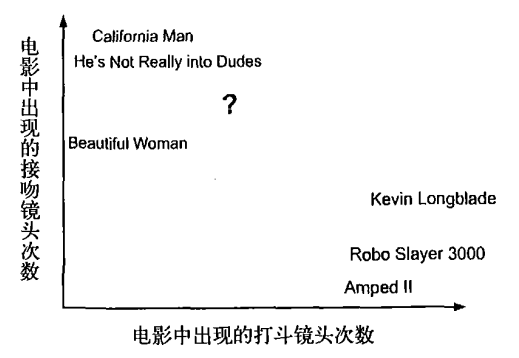

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

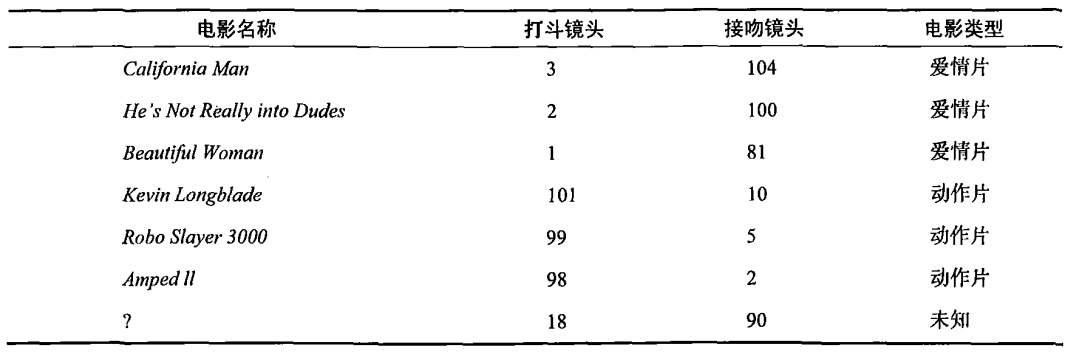

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

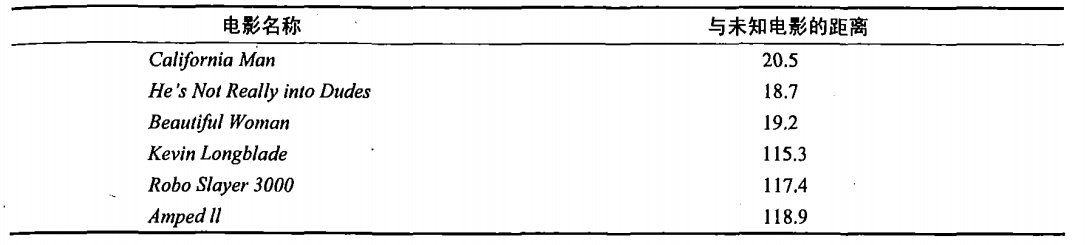

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

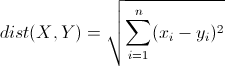

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [41]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
# 是男是女 属于分类问题
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# 训练样本 X是样本的特征 y是样本的结果（标签）
# 训练样本的特征
# 身高 体重 鞋子尺码
X_train = np.array([
    [177,73,42],
    [150,44,36],
    [177,63,41],
    [160,52,35],
    [165,70,40],
    [179,80,44],
    [156,40,36],
    [155,50,36]
])
y_train = np.array(['male','female','male','female','male','male','female','female'])

# 测试样本
X_train  # 特征
y_train  # 结果（标签）

array(['male', 'female', 'male', 'female', 'male', 'male', 'female',
       'female'], dtype='<U6')

In [5]:
# KNeighborsClassifier 用来获取分类的模型
# 参数 n_neighbors 指的是 考虑最近的几个 默认是5个
knn_c = KNeighborsClassifier(n_neighbors=5)

In [14]:
#  knn_c.fit(X, y)
# 参数 X 是训练数据的特征
# 参数 y 是训练数据的结果（标签）
knn_c.fit(X_train,y_train)  # knn模型的训练很简单 就是记录一下各个样本的位置
# 现在这个模型就是已经训练好的模型了

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
# knn_c.predict() 可以测试
# 参数X 是要传入的 测试数据 把特征传入 会根据训练好的模型 返回结果
knn_c.predict([
    [190,100,45],
    [150,35,32]
])

array(['male', 'female'], dtype='<U6')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [42]:
# scikit-learning 提供数据样本，可以供我们研究机器学习模型
# 可以使用load方法加载datasets中的各种数据
from sklearn import datasets
import matplotlib.pyplot as plt

获取训练样本  datasets.load_iris()

In [41]:
iris_data = datasets.load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
print('Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n    :Missing Attribute Values: None\n    :Class Distribution: 33.3% for each of 3 classes.\n    :Creator: R.A. Fisher\n    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)\n    :Date: July, 1988\n\nThis is a copy of UCI ML iris datasets.\nhttp://archive.ics.uci.edu/ml/datasets/Iris\n\nThe famous Iris database, first used by Sir R.A Fisher\n\nThis is perhaps the best known database to be found in the\npattern recognition literature.  Fisher\'s paper is a classic in the field and\nis referenced frequently to this day.  (See Duda & Hart, for example.)  The\ndata set contains 3 classes of 50 instances each, where each class refers to a\ntype of iris plant.  One class is linearly separable from the other 2; the\nlatter are NOT linearly separable from each other.\n\nReferences\n----------\n   - Fisher,R.A. "The use of multiple measurements in taxonomic problems"\n     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to\n     Mathematical Statistics" (John Wiley, NY, 1950).\n   - Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.\n     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.\n   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System\n     Structure and Classification Rule for Recognition in Partially Exposed\n     Environments".  IEEE Transactions on Pattern Analysis and Machine\n     Intelligence, Vol. PAMI-2, No. 1, 67-71.\n   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions\n     on Information Theory, May 1972, 431-433.\n   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II\n     conceptual clustering system finds 3 classes in the data.\n   - Many, many more ...\n')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [24]:
# 
data = iris_data.data  # 所有样本的特征
target = iris_data.target  # 所有样本的目标值
feature_names = iris_data.feature_names  # 特征的名字
target_names = iris_data.target_names  # 目标值的名称

绘制图形

In [25]:
DataFrame(data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


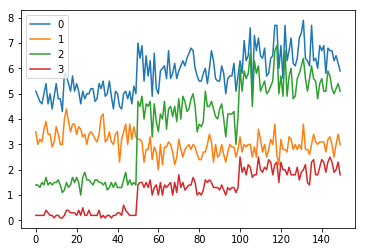

In [26]:
DataFrame(data).plot()

画图研究前两个特征和分类之间的关系（二维散点图只能展示两个维度）

In [31]:
# 为了给大家展示 我这里只研究前两个特征 和 分类的关系 （大家自己用knn分类的时候 最好是把四个特征都算上）
X_train = data[:,0:2]  # 所有行都要,0-2列 2取不到 就是0和1
X_train  # 训练样本的特征
# 训练样本的标签（结果）
y_train = target  # 训练样本的结果
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0,0.5,'sepal width')

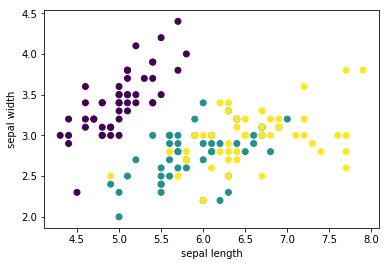

In [39]:
# 展示关系用散点图
# x, y x是一个特征 y是另一个特征 这样 一个点的位置就有了
# 花萼长度作为x 花萼宽度作为y 对所有样本进行定位 然后 不同的分类用不同的颜色来标注
# c参数传入的列表是各个样本的分类编号 scatter 对象根据 不同的编号给样本分配不同的颜色
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

定义KNN分类器

In [42]:
knn_c = KNeighborsClassifier(n_neighbors=5)

第一步，训练数据

In [43]:
# 训练模型
# 调用 knn_c.fit 方法 传入 训练集数据的特征 和 训练集数据的结果
knn_c.fit(X_train,y_train)
# knn_c.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
# 可以测试了 传入 样本的特征 会返回这个样本的分类
knn_c.predict([
    [4.5,4.0],
    [7.5,3.0],
    [5.25,2.25]
])

array([0, 2, 1])

第二步预测数据：所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [52]:
# 获取平面上的所有点
# 先把x轴线的范围和y轴的范围获取到
xmin = X_train[:,0].min()-0.5
xmax = X_train[:,0].max()+0.5
ymin = X_train[:,1].min()-0.5
ymax = X_train[:,1].max()+0.5

In [57]:
np.meshgrid([1,2,3],[4,5,6])

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

In [72]:
# x轴范围内要取遍
x = np.arange(xmin,xmax,0.01)
# y轴范围内也要取遍
y = np.arange(ymin,ymax,0.01)
y
# 把画布上所有的点都取遍
xx,yy = np.meshgrid(x,y)
xx.flatten(),yy.flatten()

(array([3.8 , 3.81, 3.82, ..., 8.38, 8.39, 8.4 ]),
 array([1.5, 1.5, 1.5, ..., 4.9, 4.9, 4.9]))

In [64]:
xx.flatten()

array([3.8, 3.9, 4. , ..., 8.1, 8.2, 8.3])

In [66]:
yy.flatten()

array([1.5, 1.5, 1.5, ..., 4.8, 4.8, 4.8])

In [73]:
# 把对应位置的两个内容取出来 变成新的列表
X_test = np.c_[xx.flatten(),yy.flatten()]  # 将平面上所有的点取遍 并 用来作为测试数据
X_test

array([[3.8 , 1.5 ],
       [3.81, 1.5 ],
       [3.82, 1.5 ],
       ...,
       [8.38, 4.9 ],
       [8.39, 4.9 ],
       [8.4 , 4.9 ]])

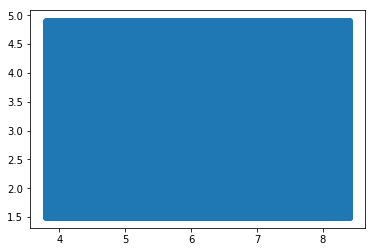

In [74]:
plt.scatter(X_test[:,0],X_test[:,1])

对数据进行预测

In [79]:
y_ = knn_c.predict(X_test)
y_  # y_是模型预测的结果 真实结果用y_test

array([1, 1, 1, ..., 2, 2, 2])

以图形化的效果展示结果

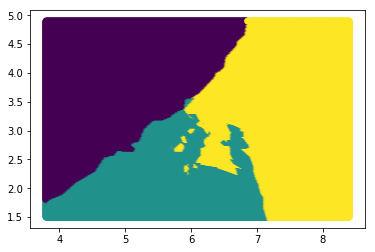

In [82]:
# 根据特征绘制样本的位置 根据模型预测的结果 绘制样本的颜色
plt.scatter(X_test[:,0],X_test[:,1],c=y_)

In [92]:
# 自己制定颜色
from matplotlib.colors import ListedColormap
cmap0 = ListedColormap(['red','green','blue'])
cmap1 = ListedColormap(['#cc99bb','#88ddbb','#8899ff'])
cmap2 = ListedColormap(['#dd2244','#00ee33','#0011ff'])

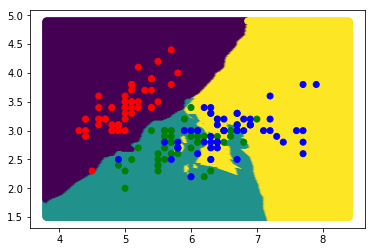

In [93]:
# 把真实的训练数据也画到图上
plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cmap0)

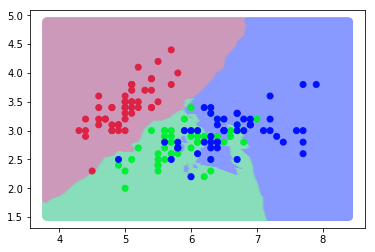

In [94]:
# 把真实的训练数据也画到图上
plt.scatter(X_test[:,0],X_test[:,1],c=y_,cmap=cmap1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cmap2)

### 2）用于回归  
回归用于对趋势的预测

导包 from sklearn.neighbors import KNeighborsRegressor

In [2]:
from sklearn.neighbors import KNeighborsRegressor

生成样本数据

In [32]:
np.random.seed(0)
np.random.random()
nd = np.random.rand(40,1)  #  样本 40行1列
nd

array([[0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ],
       [0.64589411],
       [0.43758721],
       [0.891773  ],
       [0.96366276],
       [0.38344152],
       [0.79172504],
       [0.52889492],
       [0.56804456],
       [0.92559664],
       [0.07103606],
       [0.0871293 ],
       [0.0202184 ],
       [0.83261985],
       [0.77815675],
       [0.87001215],
       [0.97861834],
       [0.79915856],
       [0.46147936],
       [0.78052918],
       [0.11827443],
       [0.63992102],
       [0.14335329],
       [0.94466892],
       [0.52184832],
       [0.41466194],
       [0.26455561],
       [0.77423369],
       [0.45615033],
       [0.56843395],
       [0.0187898 ],
       [0.6176355 ],
       [0.61209572],
       [0.616934  ],
       [0.94374808],
       [0.6818203 ],
       [0.3595079 ]])

In [36]:
# 对nd进行排序 然后放大5倍数
# np.sort() 默认对最内层的数据进行排序 现在要对每一行进行排序 让样本从小到大排列
X_train = 5*np.sort(nd,axis=0)
X_train  # 训练集 特征值

array([[0.093949  ],
       [0.10109199],
       [0.35518029],
       [0.4356465 ],
       [0.59137213],
       [0.71676644],
       [1.32277806],
       [1.7975395 ],
       [1.91720759],
       [2.0733097 ],
       [2.118274  ],
       [2.18793606],
       [2.28075166],
       [2.30739681],
       [2.60924161],
       [2.6444746 ],
       [2.72441591],
       [2.84022281],
       [2.84216974],
       [3.01381688],
       [3.06047861],
       [3.08466998],
       [3.08817749],
       [3.19960511],
       [3.22947057],
       [3.4091015 ],
       [3.57594683],
       [3.87116845],
       [3.89078375],
       [3.90264588],
       [3.95862519],
       [3.99579282],
       [4.16309923],
       [4.35006074],
       [4.458865  ],
       [4.62798319],
       [4.71874039],
       [4.72334459],
       [4.8183138 ],
       [4.89309171]])

In [52]:
# 获取训练集的结果
X_train
y_train = np.sin(X_train).flatten()
y_train  # y_train的形状是一维数组

array([ 0.09381086,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.65695022,  0.96940081,  0.97440371,  0.94059723,  0.87637482,
        0.8538402 ,  0.81553704,  0.75839099,  0.74075654,  0.50756044,
        0.47689441,  0.40518094,  0.29682859,  0.29496884,  0.12742837,
        0.08102512,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.26432971, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.72911815, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.99643995, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

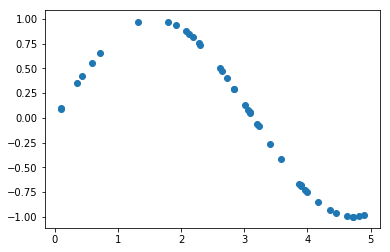

In [53]:
plt.scatter(X_train,y_train)

In [54]:
# 给y_train添加一些噪声 让x和y的关系不要那么明确
noise = np.random.random(size=10)/2
noise

array([0.2343256 , 0.48838054, 0.30242276, 0.36963179, 0.0195939 ,
       0.14140348, 0.06009828, 0.1480701 , 0.05936386, 0.15899159])

In [55]:
y_train.shape  # 40个
y_train

array([ 0.09381086,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.65695022,  0.96940081,  0.97440371,  0.94059723,  0.87637482,
        0.8538402 ,  0.81553704,  0.75839099,  0.74075654,  0.50756044,
        0.47689441,  0.40518094,  0.29682859,  0.29496884,  0.12742837,
        0.08102512,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.26432971, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.72911815, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.99643995, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

In [56]:
noise  # 10个噪声
y_train[::4] += noise

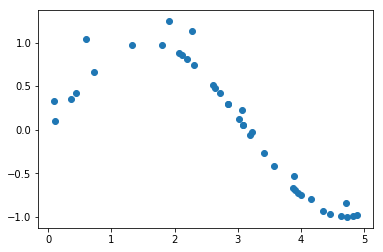

In [57]:
plt.scatter(X_train,y_train)

生成测试数据并预测结果

第一步：生成模型，并训练数据

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
# 获取模型
knn = KNeighborsRegressor(n_neighbors=30)

In [92]:
# 把训练数据传入模型
knn.fit(X_train,y_train)  # X_train是多行数据 有几个样本就有几行 有几个特征就有几列
# y_train 是一个一维的数组 里面直接装着结果值

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform')

第二步：使用模型，预测数据

In [93]:
# 把x范围内的值取遍 然后用机器学习模型获取y_
xmin = X_train.min()
xmax = X_train.max()
# 根据最小值和最大值 取遍整个范围
X_test = np.arange(xmin,xmax,0.01)  # 从最小值到最大值 每隔0.1取一个座位测试数据
X_test

array([0.093949, 0.103949, 0.113949, 0.123949, 0.133949, 0.143949,
       0.153949, 0.163949, 0.173949, 0.183949, 0.193949, 0.203949,
       0.213949, 0.223949, 0.233949, 0.243949, 0.253949, 0.263949,
       0.273949, 0.283949, 0.293949, 0.303949, 0.313949, 0.323949,
       0.333949, 0.343949, 0.353949, 0.363949, 0.373949, 0.383949,
       0.393949, 0.403949, 0.413949, 0.423949, 0.433949, 0.443949,
       0.453949, 0.463949, 0.473949, 0.483949, 0.493949, 0.503949,
       0.513949, 0.523949, 0.533949, 0.543949, 0.553949, 0.563949,
       0.573949, 0.583949, 0.593949, 0.603949, 0.613949, 0.623949,
       0.633949, 0.643949, 0.653949, 0.663949, 0.673949, 0.683949,
       0.693949, 0.703949, 0.713949, 0.723949, 0.733949, 0.743949,
       0.753949, 0.763949, 0.773949, 0.783949, 0.793949, 0.803949,
       0.813949, 0.823949, 0.833949, 0.843949, 0.853949, 0.863949,
       0.873949, 0.883949, 0.893949, 0.903949, 0.913949, 0.923949,
       0.933949, 0.943949, 0.953949, 0.963949, 0.973949, 0.983

In [65]:
X_test.reshape(-1,1)

array([[0.093949],
       [0.193949],
       [0.293949],
       [0.393949],
       [0.493949],
       [0.593949],
       [0.693949],
       [0.793949],
       [0.893949],
       [0.993949],
       [1.093949],
       [1.193949],
       [1.293949],
       [1.393949],
       [1.493949],
       [1.593949],
       [1.693949],
       [1.793949],
       [1.893949],
       [1.993949],
       [2.093949],
       [2.193949],
       [2.293949],
       [2.393949],
       [2.493949],
       [2.593949],
       [2.693949],
       [2.793949],
       [2.893949],
       [2.993949],
       [3.093949],
       [3.193949],
       [3.293949],
       [3.393949],
       [3.493949],
       [3.593949],
       [3.693949],
       [3.793949],
       [3.893949],
       [3.993949],
       [4.093949],
       [4.193949],
       [4.293949],
       [4.393949],
       [4.493949],
       [4.593949],
       [4.693949],
       [4.793949]])

In [94]:
# 还是之前的问题 传入的 数据集 是 多个样本的多个特征
# 每个样本是一行 每个特征是一列
# 我们这里有很多样本 每个样本有一个特征
# 应该是很多行 1列 的 结构
y_ = knn.predict(X_test.reshape(-1,1))  # 传入测试数据 获取 预测结果
y_

array([ 0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34347167,
        0.34347167,  0.34347167,  0.34347167,  0.34347167,  0.34

绘图显示数据

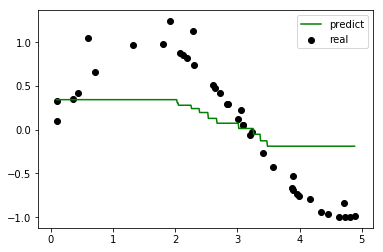

In [95]:
plt.plot(X_test,y_,color='green',label='predict')
plt.scatter(X_train,y_train,label='real',color='k')
plt.legend()
# knn可以用来做回归 但是一般不用

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](./img/stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

https://github.com/jakobgerstenlauer/SmartphoneMobility

activity_labels.txt（运动标签说明）

https://github.com/jakobgerstenlauer/SmartphoneMobility/blob/master/activity_labels.txt

导入数据

nd = np.array([1,2,3])

np.save('./my_data',nd)

np.load('./my_data.npy')

In [98]:
# ***.npy 是numpy的数据文件
nd = np.array([1,2,3])
nd
# np.save方法可以把数据保存到本地 参数 1.是路径 2.是数据
np.save('./test',nd)

In [101]:
# 加载数据
# np.load可以加载数据 参数： 传入文件的路径
np.load('./test.npy')  # 记得加后缀

array([1, 2, 3])

In [111]:
# 获取 训练集 和 测试集
# 训练集
X_train = np.load('./data/x_train.npy')
# X_train.shape
y_train = np.load('./data/y_train.npy')
y_train
y_train.size
# y_train.unique()
Series(y_train).unique()
# 测试集
X_test = np.load('./data/x_test.npy')
y_test = np.load('./data/y_test.npy')

In [142]:
y_test
Series(y_test).unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [110]:
labels = {
    1:'walking',
    2:'walking upstairs',
    3:'walking downstairs',
    4:'sitting',
    5:'standing',
    6:'laying'
}
labels

{1: 'walking',
 2: 'walking upstairs',
 3: 'walking downstairs',
 4: 'sitting',
 5: 'standing',
 6: 'laying'}

In [124]:
n = 600
y_train[n]
labels[y_train[n]]
# X_train[n]

'laying'

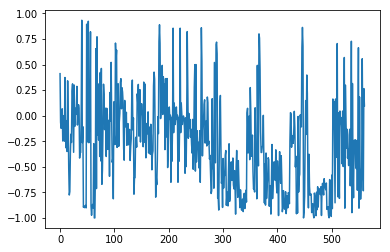

In [121]:
plt.plot(X_train[300])

绘图

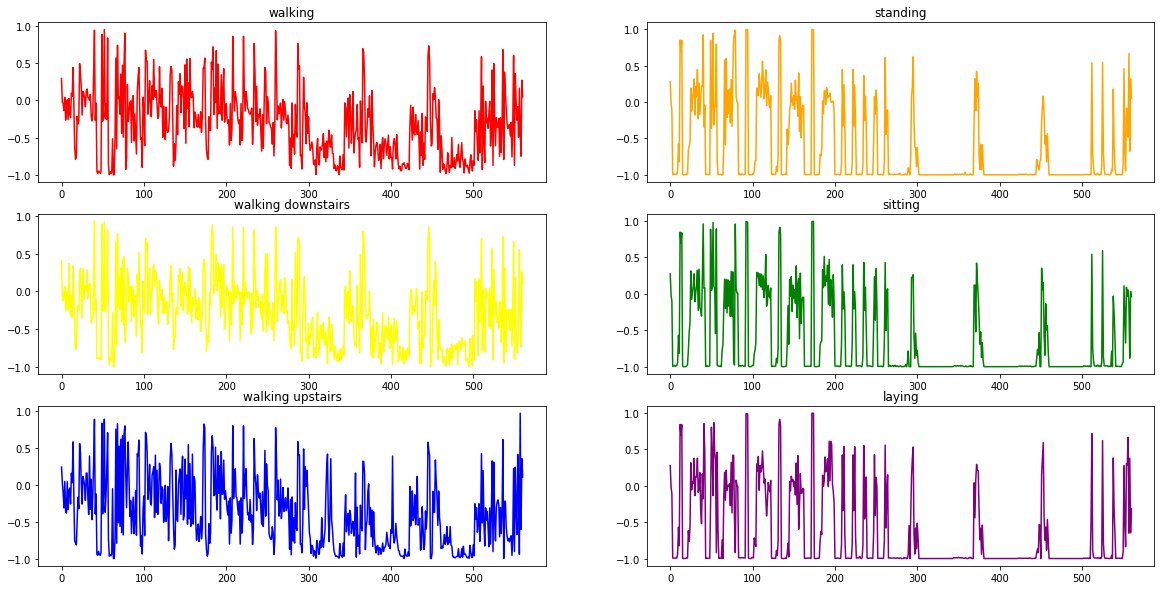

In [140]:
colors = ['red','orange','yellow','green','blue','purple']
plt.figure(figsize=(20,10))
for i in [1,2,3,4,5,6]:
    # print(i)
    # print(labels[y_train[i*100]])
    axes = plt.subplot(3,2,i)
    axes.plot(X_train[i*100],color=colors[i-1])
    axes.set_title(labels[y_train[i*100]])

walking upstairs


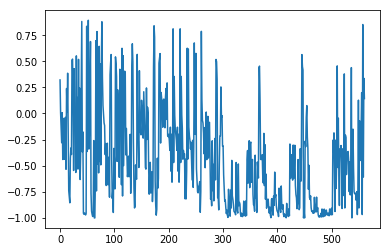

In [138]:
n = 666
print(labels[y_train[n]])  # 当前是什么运动
plt.plot(X_train[n])  # 绘图

训练模型

In [156]:
knn = KNeighborsClassifier(n_neighbors=10)

In [157]:
# 传入训练数据 去训练模型
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

测试模型

In [158]:
# 预测结果
y_ = knn.predict(X_test)
y_

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

查看准确率

In [148]:
# y_是根据X_test和模型预测出来的结果
# y_test是真实的结果
# 想看准确率 就 正确的数量/总数量
y_test.size  # 总数量

2947

In [150]:
y_

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [151]:
y_test

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [149]:
y_ == y_test  # 获取的是布尔值的序列 相等的是True 不想等是False

array([ True,  True,  True, ...,  True,  True, False])

In [152]:
# True是1 False是0
(y_ == y_test).sum()

2657

In [159]:
(y_ == y_test).sum() / y_test.size

0.9066847641669494

In [160]:
# 刚才我们是自己计算的成功率
# 实际上 机器学习模型 给我们提供了 打分的方法
# 参数 1.是测试集的特征数据 2.是测试集的真实结果
# 把测试集的特征数据传入后 机器学习模型 会 计算得到预测结果y_
# 然后和传入的真是结果 y_test 对比 返回准确率
knn.score(X_test,y_test)

0.9066847641669494